In [ ]:

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drug200.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

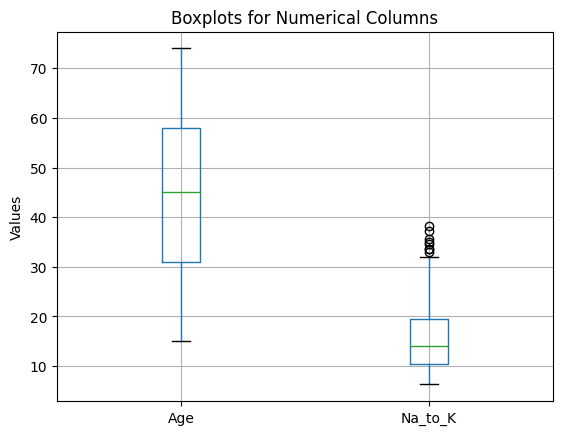

In [ ]:
numerical_columns = ['Age', 'Na_to_K']
df[numerical_columns].boxplot()

# Adding title and labels
plt.title('Boxplots for Numerical Columns')
plt.ylabel('Values')
plt.xticks([1, 2], numerical_columns)

# Display the plot
plt.show()

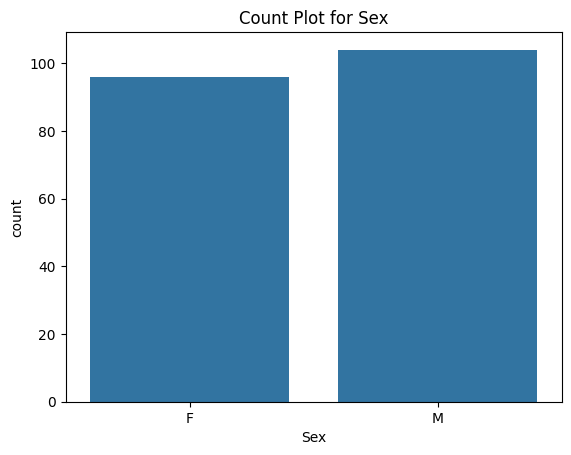

In [ ]:
sns.countplot(data=df, x='Sex')
plt.title('Count Plot for Sex')
plt.show()


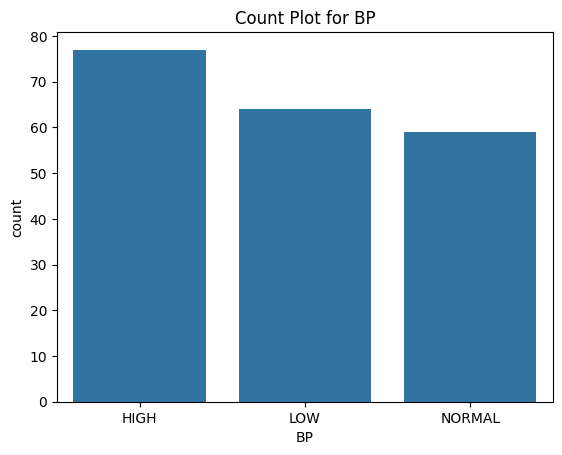

In [ ]:
sns.countplot(data=df, x='BP')
plt.title('Count Plot for BP')
plt.show()

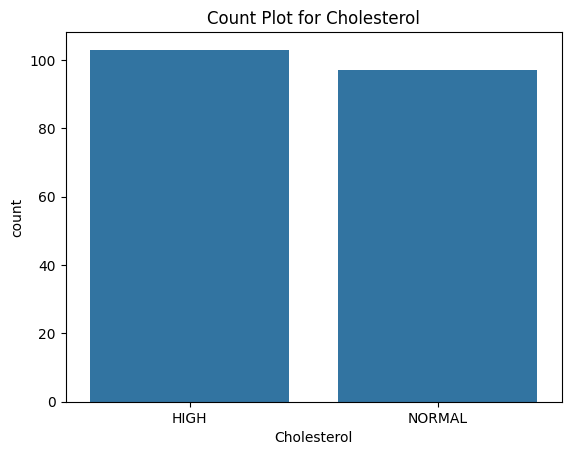

In [ ]:
sns.countplot(data=df, x='Cholesterol')
plt.title('Count Plot for Cholesterol')
plt.show()

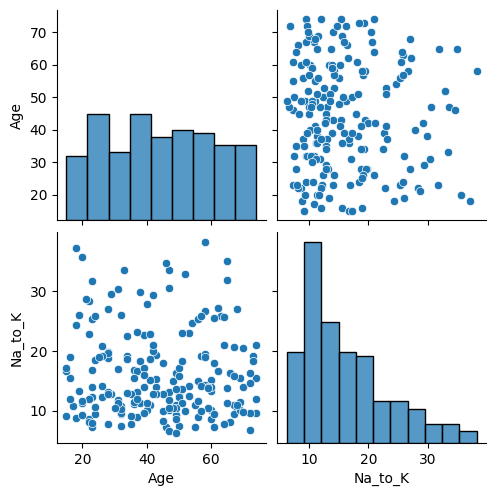

In [ ]:
# 3. Pairplot for Numerical Columns
sns.pairplot(df[['Age', 'Na_to_K']])
plt.show()



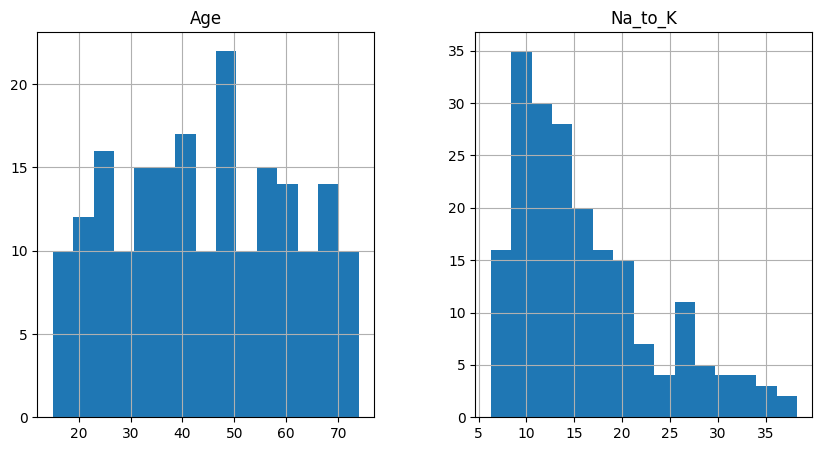

In [ ]:
# 4. Histograms for Numerical Columns
df[['Age', 'Na_to_K']].hist(bins=15, figsize=(10, 5), layout=(1, 2))
plt.show()

In [ ]:
dummy=pd.get_dummies(df)
dummy

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,23,25.355,True,False,True,False,False,True,False,False,False,False,False,True
1,47,13.093,False,True,False,True,False,True,False,False,False,True,False,False
2,47,10.114,False,True,False,True,False,True,False,False,False,True,False,False
3,28,7.798,True,False,False,False,True,True,False,False,False,False,True,False
4,61,18.043,True,False,False,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,True,False,False,True,False,True,False,False,False,True,False,False
196,16,12.006,False,True,False,True,False,True,False,False,False,True,False,False
197,52,9.894,False,True,False,False,True,True,False,False,False,False,True,False
198,23,14.020,False,True,False,False,True,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:

x = df.drop(columns=['Drug'])

In [ ]:
y=df['Drug']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.2, random_state=42 )
x_train


,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [ ]:
x_test


,Age,Sex,BP,Cholesterol,Na_to_K
95,36,1,1,1,11.424
15,16,0,0,1,15.516
30,18,0,2,1,8.750
158,59,0,1,0,10.444
128,47,1,1,1,33.542
115,51,1,0,0,18.295
69,18,0,0,1,24.276
170,28,0,2,0,12.879
174,42,1,0,1,12.766
45,66,0,2,1,8.107


In [ ]:
y_train


79     3
197    3
38     3
24     4
122    4
      ..
106    3
14     3
92     4
179    4
102    2
Name: Drug, Length: 160, dtype: int64

In [ ]:
y_test

95     3
15     4
30     3
158    2
128    4
115    4
69     4
170    3
174    0
45     3
66     0
182    3
165    4
78     0
186    1
177    4
56     1
152    3
82     2
68     4
124    1
16     3
148    3
93     4
65     4
60     4
84     2
67     3
125    4
132    3
9      4
18     2
55     2
75     4
150    0
104    4
135    3
137    0
164    4
76     0
Name: Drug, dtype: int64

In [ ]:
dt=DecisionTreeClassifier(random_state=42)
model=dt.fit(x_train,y_train)

In [ ]:
model.tree_.node_count


11

In [ ]:
model.tree_.max_depth

4

In [ ]:
model

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

1.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier

grid={
    'max_depth':range(1,20),
    'max_features':[2,3,4,5]
}

model=DecisionTreeClassifier(criterion='entropy',random_state=42)

gs=GridSearchCV(estimator=model,param_grid=grid,cv=6,scoring='accuracy',n_jobs=1)

gs.fit(x_train,y_train)

best_parameters=gs.best_params_
best_score=gs.best_score_

print(best_parameters)
print(best_score)




{'max_depth': 4, 'max_features': 4}
0.9874169040835707


In [ ]:
 gs.best_estimator_.tree_.node_count



4

In [ ]:
 gs.best_estimator_.tree_.max_depth

4

In [ ]:
!pip install graphviz
import graphviz as gv
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

# Export the decision tree to a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=x.columns,
                           class_names=[str(c) for c in le.classes_],  # Ensure class names are strings
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree using graphviz
graph = gv.Source(dot_data)
graph.render("decision_tree")
graph.view()

Accuracy on test set: 1.0


'decision_tree.pdf'